B_hor1 1.0184625104591734e-05, 1.389632847159743e-07 un 
B_hor2 9.523871051293689e-06, 1.0359870726036538e-07 un 
B_hor1 1.0441797853025233e-05, 1.0670961235173765e-07 un 


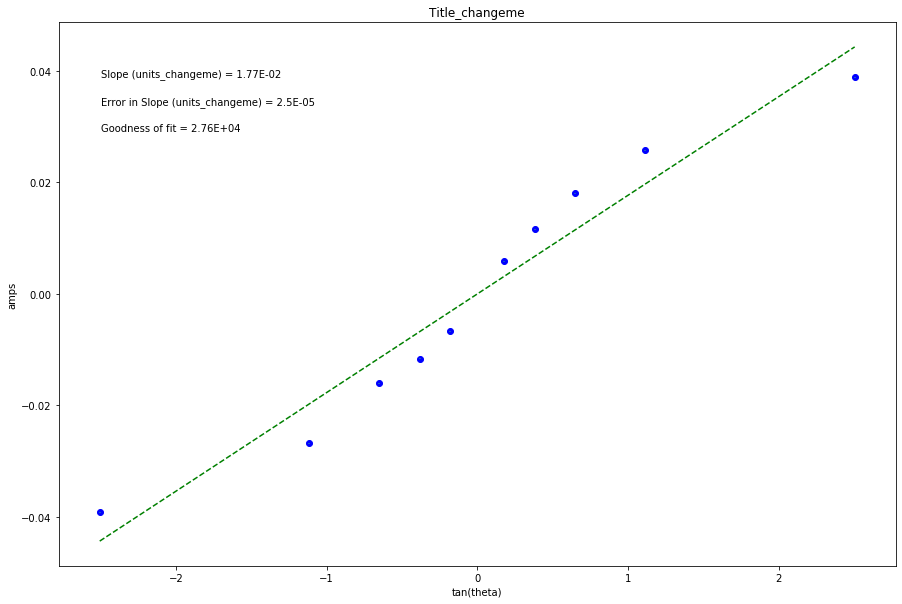

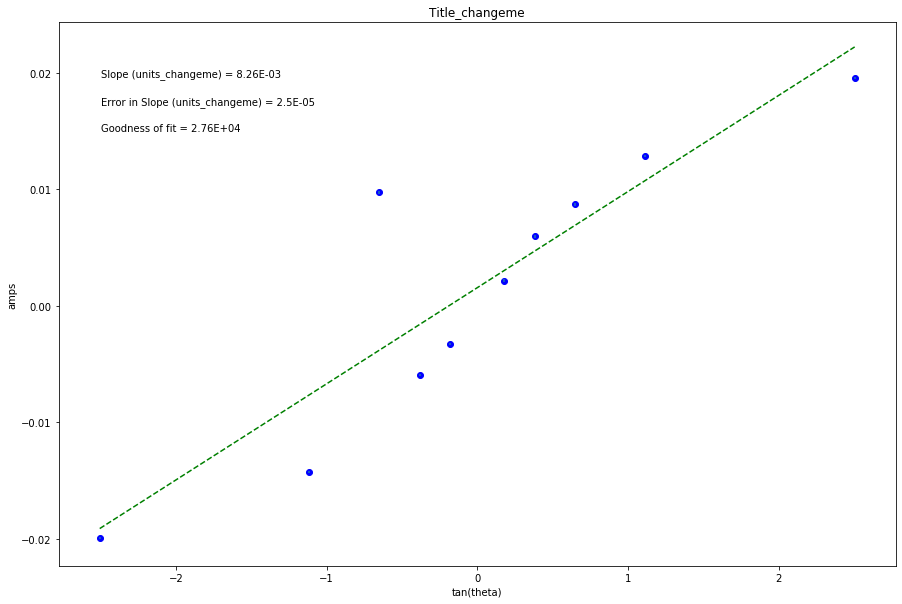

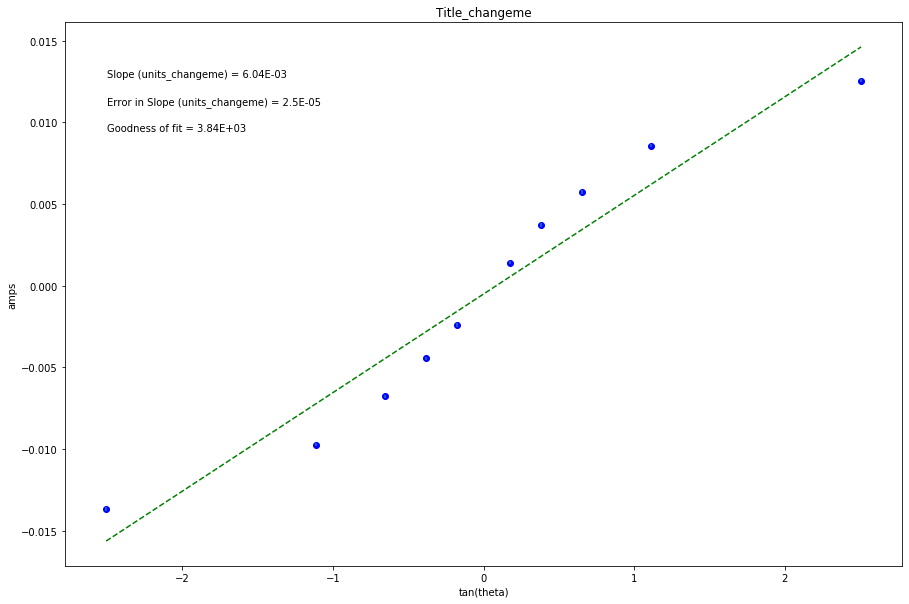

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D

def LLSFD2(x,y,dy,b,m):
    N = sum(((y-b-m*x)/dy)**2)
    return N
mu = 4*np.pi*10**-7
r = .109 # in meters
def BEhor(m, mu, N, r):
    BEhor = (m*mu*N)/(2*r)
    return BEhor
def rule4(Q, A, B, C, Aun, Bun, Cun, Ae, Be, Ce):
    Qun = np.abs(Q)*np.sqrt(((Ae*Aun/A)**2)+((Be*Bun/B)**2+((Ce*Cun/C)**2)))
    return Qun

I100 = np.array([-.0391, -.0268, -.016, -.0116, -.0067, .0058, .0116, .0180, .0257, .0388]) # in amps
I200 = np.array([-.01997, -.01427, .00974, -.00597, -.00330, .00216, .00596, .00871, .01288, .01956]) # in amps
I300 = np.array([-.01368, -.00974, -.00678, -.00445, -.00240, .0014, .00371, .00573, .00856, .01255]) # in amps
tan_theta = np.tan(np.array([-1.191, -.83909, -.57735, -.36397, -.176326, .176326, .36397, .57735, .83909, 1.191])) # in radians

I_un = np.array([.0001, .0001, .0001, .0001, .0001, .0001, .0001, .0001, .0001, .0001])

x1 = tan_theta
y1 = I100
dy = I_un

b1, m1 = np.polynomial.polynomial.polyfit(x1, y1, 1, w=dy)
fit1 = b1+m1*x1
D1=Delta(I100, I_un)
dm1 = np.sqrt(1/D1*sum(1/I_un**2))
N100 = LLSFD2(I100, tan_theta, I_un, b1, m1)

D = Delta(x1, dy)

dm = np.sqrt(1 / D * sum(1 / dy ** 2))  # error in slope
db = np.sqrt(1 / D * sum(x1 ** 2 / dy ** 2))  # error in intercept

N1 = LLSFD2(x1, y1, dy, b1, m1)

plt.figure(figsize=(15, 10))

plt.plot(x1, fit1, color='green', linestyle='--')
plt.scatter(x1, y1, color='blue', marker='o')

plt.xlabel('tan(theta)');
plt.ylabel('amps');
plt.title('Title_changeme');

plt.errorbar(x1, y1, yerr=dy, xerr=None, fmt="none")

plt.annotate('Slope (units_changeme) = {value:.{digits}E}'.format(value=m1, digits=2),
             (0.05, 0.9), xycoords='axes fraction')

plt.annotate('Error in Slope (units_changeme) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')

plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')
BEhor1 = BEhor(m1, mu, 100, r)
B1_un = rule4(BEhor1, m1, r, 100, .000025, .001, 1, 1, 1, 1)
print("B_hor1 {}, {} un " .format(BEhor1, B1_un))
y2 = I200


b2, m2 = np.polynomial.polynomial.polyfit(x1, y2, 1, w=dy)
fit2 = b2+m2*x1
D2=Delta(I200, I_un)
dm1 = np.sqrt(1/D2*sum(1/I_un**2))
N200 = LLSFD2(I200, tan_theta, I_un, b2, m2)

D = Delta(x1, dy)

dm = np.sqrt(1 / D * sum(1 / dy ** 2))  # error in slope
db = np.sqrt(1 / D * sum(x1 ** 2 / dy ** 2))  # error in intercept

N2 = LLSFD2(x1, y2, dy, b2, m2)

plt.figure(figsize=(15, 10))

plt.plot(x1, fit2, color='green', linestyle='--')
plt.scatter(x1, y2, color='blue', marker='o')

plt.xlabel('tan(theta)');
plt.ylabel('amps');
plt.title('Title_changeme');

plt.errorbar(x1, y2, yerr=dy, xerr=None, fmt="none")

plt.annotate('Slope (units_changeme) = {value:.{digits}E}'.format(value=m2, digits=2),
             (0.05, 0.9), xycoords='axes fraction')

plt.annotate('Error in Slope (units_changeme) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')

plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N2, digits=2),
             (0.05, 0.80), xycoords='axes fraction')
BEhor2 = BEhor(m2, mu, 200, r)
B2_un = rule4(BEhor2, m2, r, 200, .000025, .001, 1, 1, 1, 1)
print("B_hor2 {}, {} un " .format(BEhor2, B2_un))

y3 = I300


b3, m3 = np.polynomial.polynomial.polyfit(x1, y3, 1, w=dy)
fit3 = b3+m3*x1
D3=Delta(I300, I_un)
dm1 = np.sqrt(1/D3*sum(1/I_un**2))
N300 = LLSFD2(I300, tan_theta, I_un, b3, m3)

D = Delta(x1, dy)

dm = np.sqrt(1 / D * sum(1 / dy ** 2))  # error in slope
db = np.sqrt(1 / D * sum(x1 ** 2 / dy ** 2))  # error in intercept

N3 = LLSFD2(x1, y3, dy, b3, m3)

plt.figure(figsize=(15, 10))

plt.plot(x1, fit3, color='green', linestyle='--')
plt.scatter(x1, y3, color='blue', marker='o')

plt.xlabel('tan(theta)');
plt.ylabel('amps');
plt.title('Title_changeme');

plt.errorbar(x1, y3, yerr=dy, xerr=None, fmt="none")

plt.annotate('Slope (units_changeme) = {value:.{digits}E}'.format(value=m3, digits=2),
             (0.05, 0.9), xycoords='axes fraction')

plt.annotate('Error in Slope (units_changeme) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')

plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N3, digits=2),
             (0.05, 0.80), xycoords='axes fraction')
BEhor3 = BEhor(m3, mu, 300, r)
B3_un = rule4(BEhor3, m2, r, 300, .000025, .001, 1, 1, 1, 1)
print("B_hor1 {}, {} un " .format(BEhor3, B3_un))